<a href="https://colab.research.google.com/github/pranay2310/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [20]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2969,s2970,Movie,In Search of Fellini,Taron Lexton,"Ksenia Solo, Mary Lynn Rajskub, Maria Bello, E...",United States,"March 19, 2018",2017,R,103 min,"Action & Adventure, Dramas",A naive and sheltered young woman embarks on a...
856,s857,TV Show,Betaal,NaN,"Viineet Kumar, Aahana Kumra, Suchitra Pillai, ...",India,"May 24, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...",Hired to displace tribal villagers to make way...
5538,s5539,TV Show,Shameless (U.S.),NaN,"William H. Macy, Emmy Rossum, Justin Chatwin, ...",United States,"July 26, 2020",2019,TV-MA,10 Seasons,"TV Comedies, TV Dramas",This dramedy based on a British series centers...
865,s866,Movie,Between Worlds,Maria Pulera,"Nicolas Cage, Franka Potente, Penelope Mitchel...",Spain,"April 6, 2019",2018,R,91 min,Thrillers,"Grieving for his dead wife and daughter, a tru..."
635,s636,Movie,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,"December 25, 2018",2018,PG-13,150 min,"Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociop...


In [21]:
df.shape

(7787, 12)

In [22]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

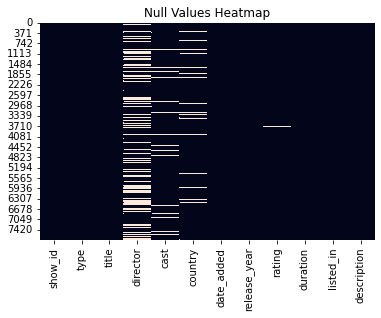

In [24]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [13]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
netflix = df.copy()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


##handling Missing and NULL values

In [28]:
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)

##Convert Date Time format

In [31]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);